In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
#generate data
x_data = np.linspace(0.0,10.0,1000000)
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
#y = mx + b     b=5
y_true = (0.5 * x_data) + 5 + noise    # for line

In [5]:
x_df =  pd.DataFrame(data=x_data, columns=['x_data'])
y_df =  pd.DataFrame(data=y_true, columns=['Y'])

In [6]:
my_data = pd.concat([x_df, y_df], axis=1)

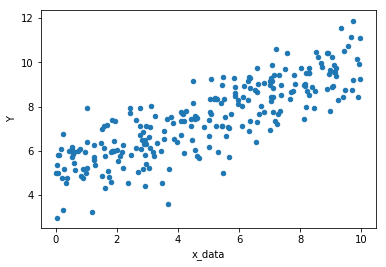

In [7]:
my_data.sample(n=250).plot(kind='scatter', x='x_data', y= 'Y')

In [8]:
batch_size = 8

In [9]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [10]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [11]:
y_model = m * xph + b 

In [12]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [13]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [14]:
train = optimizer.minimize(error)

In [15]:
init = tf.global_variables_initializer()

In [16]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
    model_m, model_b = sess.run([m,b])

In [17]:
model_m

0.52787757

In [18]:
model_b

4.836698

In [19]:
y_hat = x_data * model_m + model_b

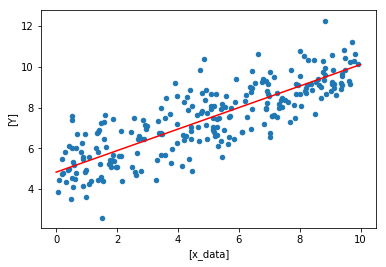

In [20]:
my_data.sample(n=250).plot(kind='scatter', x=['x_data'],y=['Y'])
plt.plot(x_data,y_hat,'r')

In [23]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [25]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

W0619 15:09:56.871944 140598157973312 estimator.py:1812] Using temporary folder as model directory: /tmp/tmpry2dxx12


In [26]:
#Train test split
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_eval, y_train,y_eval = train_test_split(x_data,y_true, test_size=0.3, random_state=0)

In [30]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4, num_epochs=None,shuffle=True)

In [31]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4, num_epochs=1000,shuffle=False)

In [32]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4, num_epochs=1000,shuffle=False)

In [33]:
estimator.train(input_fn=input_func, steps=1000)

W0619 15:16:50.489769 140598157973312 deprecation.py:323] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0619 15:16:50.566727 140598157973312 deprecation.py:323] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0619 15:16:50.575825 140598157973312 deprecation.py:323] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/inp

In [34]:
train_matrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

W0619 15:30:08.194025 140598157973312 deprecation.py:323] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [35]:
eval_matrics=  estimator.evaluate(input_fn=eval_input_func,steps=1000)

# Prediction

In [37]:
input_func_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [38]:
estimator.predict(input_fn=input_func_predict)

<generator object Estimator.predict at 0x7fded4130d68>

In [44]:
prediction = []

for x in estimator.predict(input_fn=input_func_predict):
    prediction.append(x['predictions'])
   

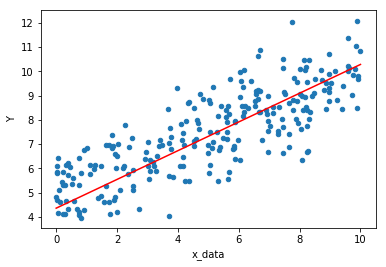

In [45]:
my_data.sample(n=250).plot(kind='scatter', x='x_data', y='Y')
    
plt.plot(np.linspace(0,10,10),prediction,'r')